# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [106]:
from citipy import citipy
from api_keys import weather_api_key
import time

RECORD_LIMIT = 50 # number of records
TIME_LIMIT = 60 #in seconds

# For debug limit number of cities to the first 5
# RECORD_LIMIT = 5 # number of records
# TIME_LIMIT = 6 #in seconds
# cities = cities[:10]

url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    'appid': weather_api_key,
    'q': '',
    'units': 'imperial'
}
city_json_data = {}


record_count = 1
set_count = 1
for city in cities:
    
    params['q'] = city
    response = requests.get(url, params=params)

    if (response.status_code == 200):
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
        city_json_data[city] = response.json()

        # Free API limits us to 60 calls per minute
        # Use 50 here to avoid running into any issue
        # More info here: 
        # https://home.openweathermap.org/subscriptions
        if record_count == RECORD_LIMIT:
            record_count = 0
            set_count +=1
            time.sleep(TIME_LIMIT)

        record_count += 1
        
    else:
        print(f"City '{city}' not found. Skipping...")

# print(city_json_data) 

Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | keningau
Processing Record 3 of Set 1 | saint-joseph
Processing Record 4 of Set 1 | krivodol
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | arraial do cabo
City 'grand river south east' not found. Skipping...
City 'illoqqortoormiut' not found. Skipping...
Processing Record 8 of Set 1 | moorhead
Processing Record 9 of Set 1 | fort nelson
Processing Record 10 of Set 1 | peniche
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | lebu
City 'satitoa' not found. Skipping...
Processing Record 16 of Set 1 | astana
Processing Record 17 of Set 1 | sao miguel do araguaia
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | sinazongwe
City 'belushya guba' not found. Skipping...
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [161]:
import json

# Specify empty column types 
# https://stackoverflow.com/questions/36462257/create-empty-dataframe-in-pandas-specifying-column-types
schema = { 
    'City': str,
    'Lat': float,
    'Lng': float,
    'Max Temp': float,
    'Humidity': int,
    'Cloudiness': int,
    'Wind Speed': float,
    'Country': str,
    'Date': int}
df = pd.DataFrame(columns=schema.keys()).astype(schema)
df['City'] = city_json_data.keys()

for index, row in df.iterrows():
    city = df.loc[index, 'City']
#     print(json.dumps(city_json_data[city], indent=4, sort_keys=True))

    df.loc[index, "Lat"] = city_json_data[city]['coord']['lat']
    df.loc[index, "Lng"] = city_json_data[city]['coord']['lon']
    df.loc[index, "Max Temp"] = city_json_data[city]['main']['temp_max']
    df.loc[index, "Humidity"] = city_json_data[city]['main']['humidity']
    df.loc[index, "Cloudiness"] = city_json_data[city]['clouds']['all']
    df.loc[index, "Wind Speed"] = city_json_data[city]['wind']['speed']
    df.loc[index, "Country"] = city_json_data[city]['sys']['country']
    df.loc[index, "Date"] = city_json_data[city]['dt']
        
df.to_csv("city_weather.csv", encoding="utf-8", index=False)
df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,67.32,72.0,20.0,1.01,CA,1.627806e+09
1,keningau,5.3378,116.1602,86.45,69.0,96.0,4.54,MY,1.627806e+09
2,saint-joseph,-21.3667,55.6167,75.58,76.0,21.0,13.62,RE,1.627806e+09
3,krivodol,43.3744,23.4844,96.13,26.0,0.0,3.15,BG,1.627806e+09
4,puerto ayora,-0.7393,-90.3518,70.56,90.0,6.0,7.00,EC,1.627806e+09
...,...,...,...,...,...,...,...,...,...
566,kirakira,-10.4544,161.9205,75.27,81.0,100.0,7.29,SB,1.627807e+09
567,guerrero negro,27.9769,-114.0611,70.79,83.0,7.0,7.83,MX,1.627807e+09
568,avera,33.1940,-82.5271,80.71,74.0,40.0,5.64,US,1.627807e+09
569,kahului,20.8947,-156.4700,76.26,77.0,1.0,18.41,US,1.627807e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.540960,14.238157,70.677846,67.010508,52.345009,8.227040,1.627807e+09
std,33.596951,89.979563,14.823030,23.382477,39.449747,5.576788,3.072609e+02
min,-54.800000,-175.200000,26.490000,8.000000,0.000000,0.000000,1.627805e+09
25%,-7.739750,-64.699400,61.830000,53.000000,10.500000,4.030000,1.627806e+09
50%,25.293400,19.911000,72.010000,73.000000,57.000000,7.160000,1.627807e+09
75%,49.791850,86.873700,81.065000,85.500000,93.000000,11.755000,1.627807e+09
max,78.218600,179.316700,106.700000,100.000000,100.000000,29.640000,1.627807e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [122]:
#  Get the indices of cities that have humidity over 100%.
# df.loc[df['Humidity'] > 100]
humid_city_indeces = df.index[df['Humidity'] >100]
humid_city_indeces

Int64Index([], dtype='int64')

In [123]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df.drop(index=humid_city_indeces, inplace=False)
clean_city_data.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,67.32,72.0,20.0,1.01,CA,1.627806e+09
1,keningau,5.3378,116.1602,86.45,69.0,96.0,4.54,MY,1.627806e+09
2,saint-joseph,-21.3667,55.6167,75.58,76.0,21.0,13.62,RE,1.627806e+09
3,krivodol,43.3744,23.4844,96.13,26.0,0.0,3.15,BG,1.627806e+09
4,puerto ayora,-0.7393,-90.3518,70.56,90.0,6.0,7.00,EC,1.627806e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'City Latitude vs. Max Temperature (08/01/21)'}, xlabel='Latitude', ylabel='Max Temperature (F)'>

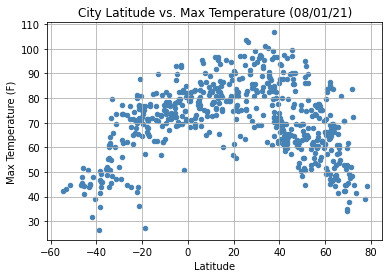

In [174]:
#Data should all be from the same day so use first index for title
city_data_date = pd.to_datetime(df['Date'], unit='s')[0].strftime("%m/%d/%y")
clean_city_data.plot('Lat',
                     'Max Temp',
                     kind="scatter",
                     legend= False,
                     xlabel ="Latitude",
                     ylabel ="Max Temperature (F)",
                     title = f'City Latitude vs. Max Temperature ({city_data_date})',
                     grid=True,
                    color='steelblue',
                    marker='o')

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'City Latitude vs. Humidity (08/01/21)'}, xlabel='Latitude', ylabel='Humidity'>

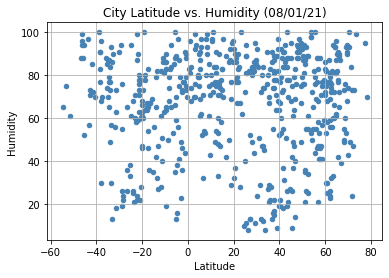

In [175]:
clean_city_data.plot('Lat',
                     'Humidity',
                     kind="scatter",
                     legend= False,
                     xlabel ="Latitude",
                     ylabel ="Humidity",
                     title = f'City Latitude vs. Humidity ({city_data_date})',
                     color='steelblue',
                     grid=True)


## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'City Latitude vs. Cloudiness (08/01/21)'}, xlabel='Latitude', ylabel='Cloudiness'>

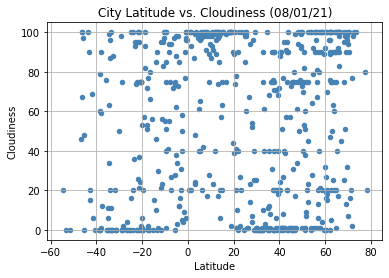

In [176]:
clean_city_data.plot('Lat',
                     'Cloudiness',
                     kind="scatter",
                     legend= False,
                     xlabel ="Latitude",
                     ylabel ="Cloudiness",
                     title = f'City Latitude vs. Cloudiness ({city_data_date})',
                     color='steelblue',
                     grid=True)

## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'City Latitude vs. Wind Speed (08/01/21)'}, xlabel='Latitude', ylabel='Wind Speed'>

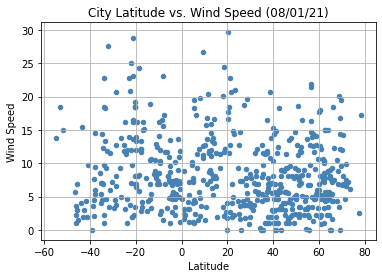

In [177]:
clean_city_data.plot('Lat',
                     'Wind Speed',
                     kind="scatter",
                     legend= False,
                     xlabel ="Latitude",
                     ylabel ="Wind Speed",
                     title = f'City Latitude vs. Wind Speed ({city_data_date})',
                     color='steelblue',
                     grid=True)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.5552763271794416


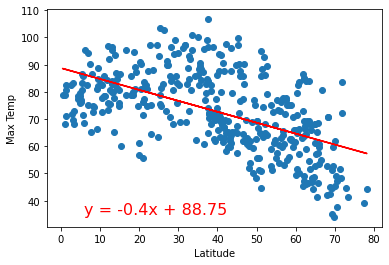

In [207]:
from scipy.stats import linregress

northern_lat_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Max Temp']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6, 35),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7351914003656226


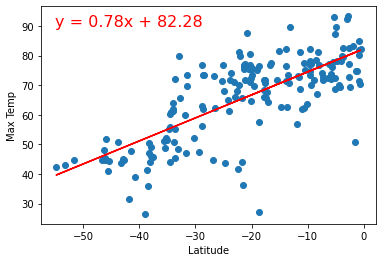

In [208]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Max Temp']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 90),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.07625341114990766


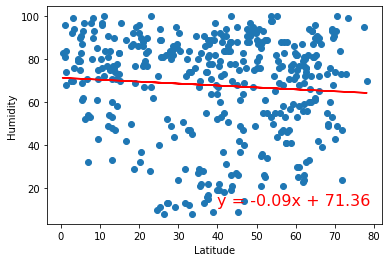

In [210]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Humidity']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 12),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.11676369654068385


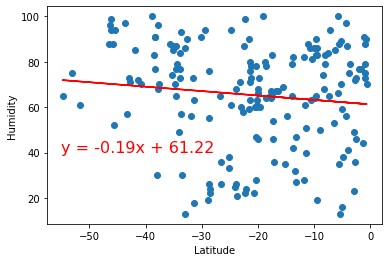

In [212]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Humidity']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 40),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.07794098153207224


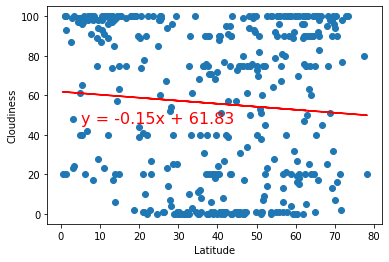

In [224]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Cloudiness']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5, 46),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19056692912181958


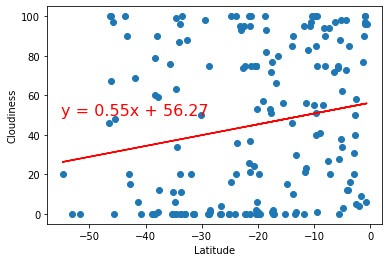

In [216]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Cloudiness']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 50),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.06599265485287668


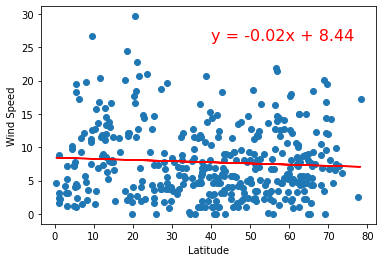

In [226]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Wind Speed']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 26),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01849504422353493


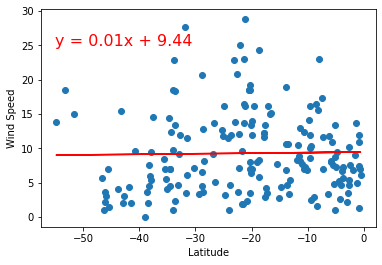

In [227]:
from scipy.stats import linregress

southern_lat_df = clean_city_data.loc[clean_city_data['Lat'] < 0]
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Wind Speed']
# print(x_values)
# print(y_values)

# Calculate line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
print(f"The r-value is: {rvalue}")

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 25),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()